# Project: Breast Cancer Prediction
Objective: Build and validate predictive models to classify whether a breast mass is benign or malignant using features derived from digital images.

In [1]:
!pip install ucimlrepo

## 1. Data Acquisition and Exploration

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch the dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Metadata
breast_cancer_wisconsin_diagnostic.metadata

# Variable information
breast_cancer_wisconsin_diagnostic.variables


,name,role,type,demographic,description,units,missing_values
0,ID,ID,Categorical,None,None,None,no
1,Diagnosis,Target,Categorical,None,None,None,no
2,radius1,Feature,Continuous,None,None,None,no
3,texture1,Feature,Continuous,None,None,None,no
4,perimeter1,Feature,Continuous,None,None,None,no
5,area1,Feature,Continuous,None,None,None,no
6,smoothness1,Feature,Continuous,None,None,None,no
7,compactness1,Feature,Continuous,None,None,None,no
8,concavity1,Feature,Continuous,None,None,None,no
9,concave_points1,Feature,Continuous,None,None,None,no


> The dataset contains various features extracted from breast cancer images. Each row represents a single observation with features like radius, texture, perimeter, area, smoothness, etc.

<Axes: title={'center': 'Distribution of Benign and Malignant Cases'}, xlabel='Diagnosis'>

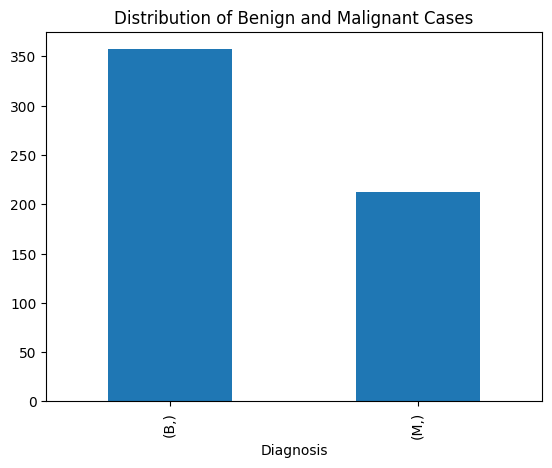

In [3]:
# Check the distribution of target classes
y.value_counts().plot(kind='bar', title='Distribution of Benign and Malignant Cases')


## 2. Data Preprocessing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


> The dataset is split into training and testing sets to evaluate model performance. Feature scaling is performed to ensure that each feature contributes equally to the model's performance.

## 3. Exploratory Data Analysis

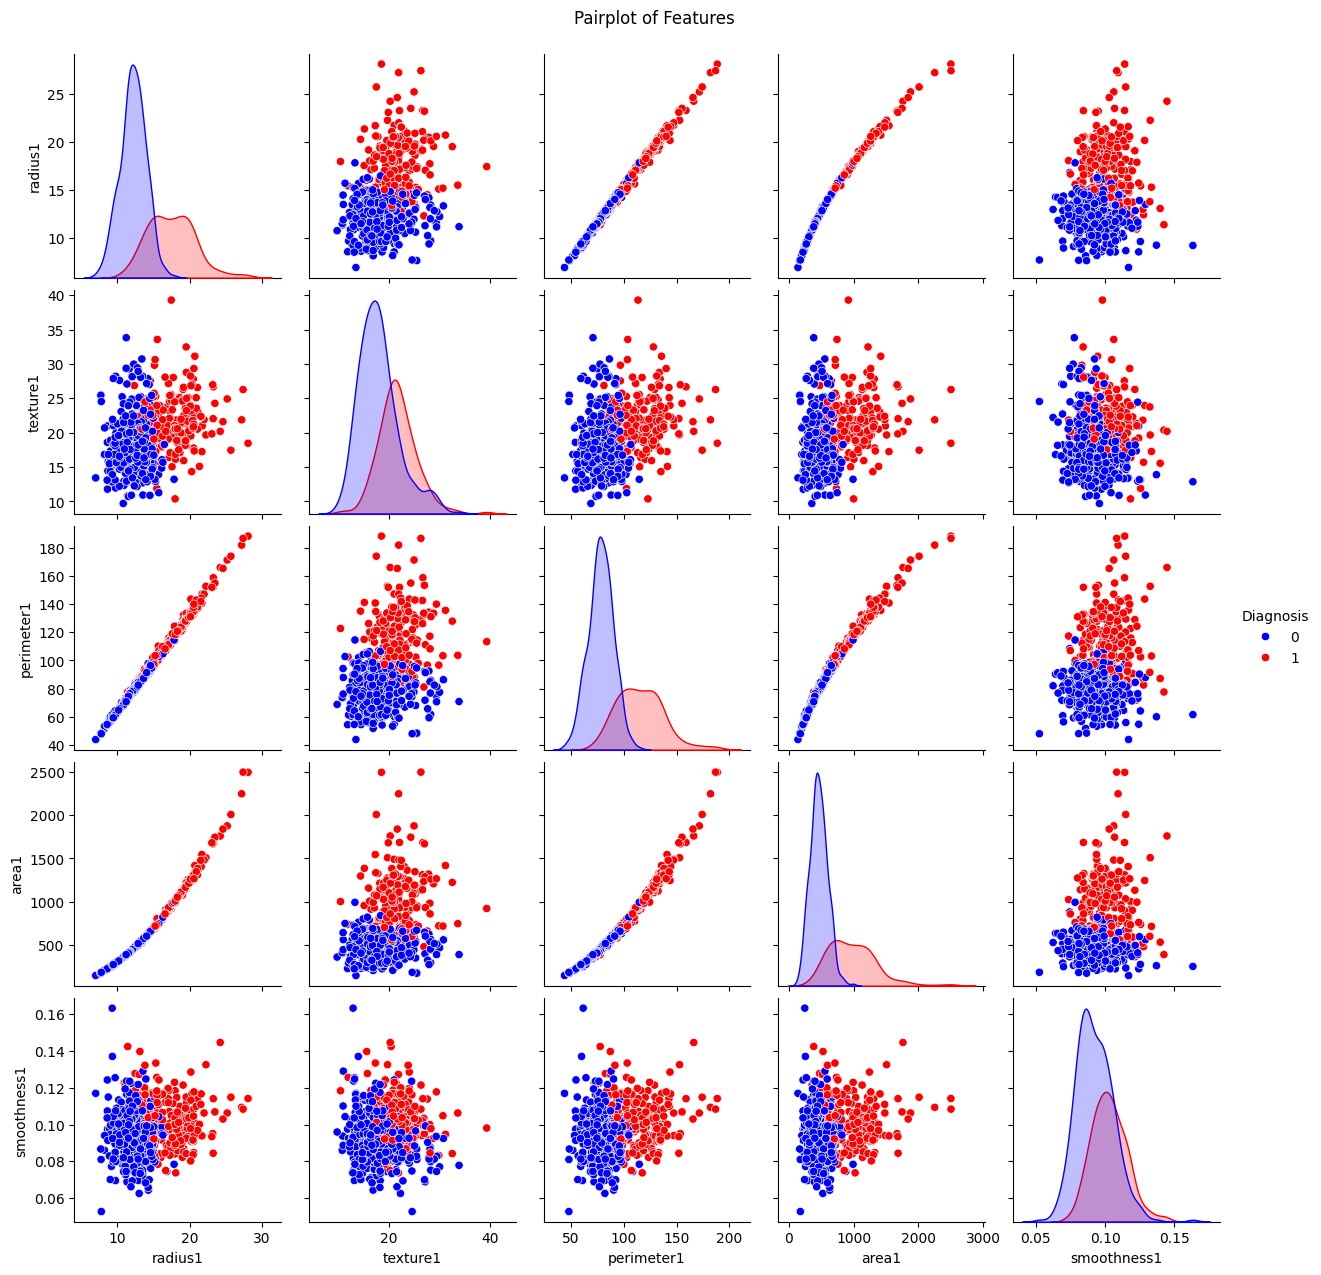

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert target to numeric values for plotting
y_numeric = y.replace({'B': 0, 'M': 1})

# Ensure the target column has the correct name
y_numeric.name = 'Diagnosis'

# Concatenate the features and the numeric target for pairplot
df = pd.concat([X, y_numeric], axis=1)

# Pairplot of a subset of features
pairplot = sns.pairplot(df, hue='Diagnosis', vars=['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1'], palette={0: 'blue', 1: 'red'})
pairplot.fig.suptitle('Pairplot of Features', y=1.02)
plt.show()

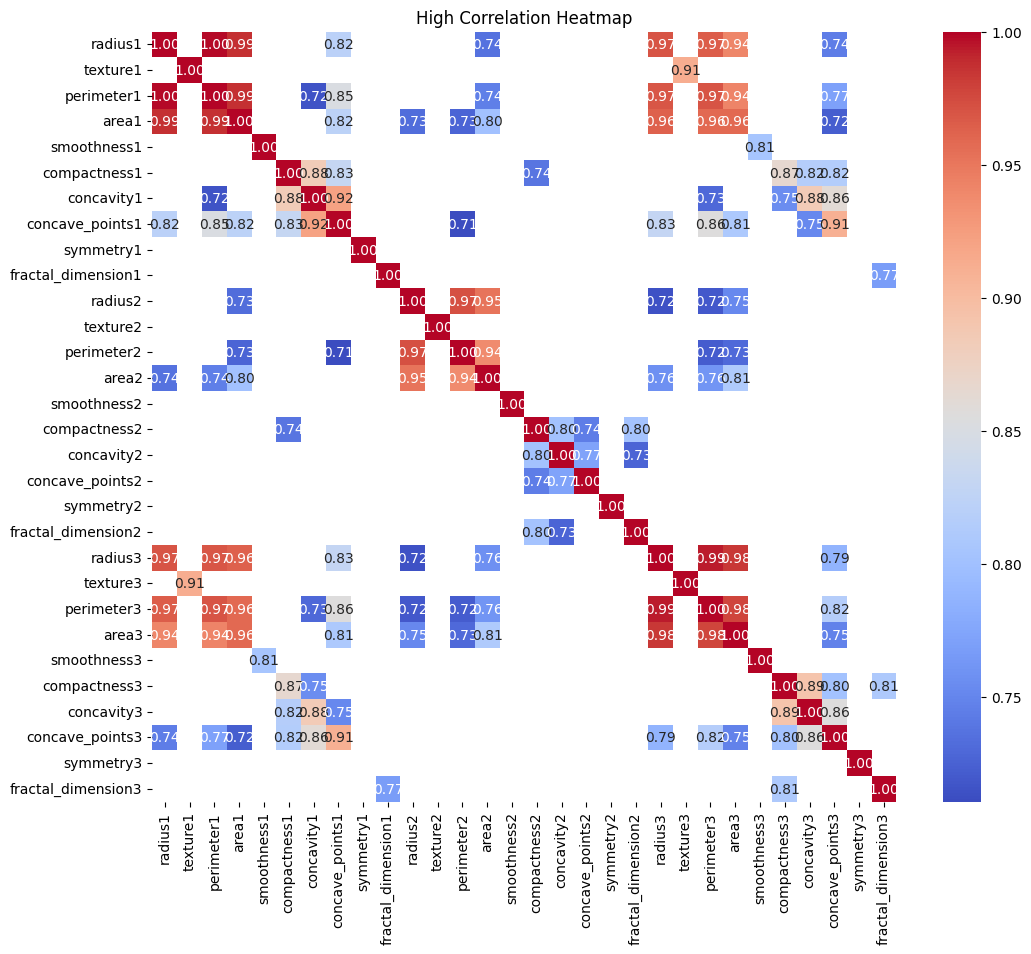

In [6]:
import numpy as np

# Calculate the correlation matrix
corr_matrix = X.corr()

# Mask to show only high correlations
mask = np.abs(corr_matrix) > 0.7

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=~mask, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('High Correlation Heatmap')
plt.show()


## 4. Model Building

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Decision Tree Classifier
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)

# SVM Classifier
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 5. Model Evaluation

In [8]:
from sklearn.metrics import classification_report

# Evaluate Decision Tree
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_tree))

# Evaluate SVM
print("SVM Classifier Report:")
print(classification_report(y_test, y_pred_svm))


Decision Tree Classifier Report:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

SVM Classifier Report:
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## 6. Model Optimization

In [9]:
from sklearn.model_selection import GridSearchCV

# Parameters for Decision Tree
param_grid_tree = {'max_depth': [3, 5, 7, None]}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5)
grid_search_tree.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)

# Parameters for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
print("Best Parameters for SVM:", grid_search_svm.best_params_)


Best Parameters for Decision Tree: {'max_depth': 3}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Parameters for SVM: {'C': 1, 'kernel': 'rbf'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

## 7. Retrain Models with Best Parameters

In [10]:
best_tree = grid_search_tree.best_estimator_
best_tree.fit(X_train, y_train)
y_pred_best_tree = best_tree.predict(X_test)
print("Optimized Decision Tree Report:")
print(classification_report(y_test, y_pred_best_tree))

best_svm = grid_search_svm.best_estimator_
best_svm.fit(X_train, y_train)
y_pred_best_svm = best_svm.predict(X_test)
print("Optimized SVM Report:")
print(classification_report(y_test, y_pred_best_svm))


Optimized Decision Tree Report:
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        71
           M       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Optimized SVM Report:
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


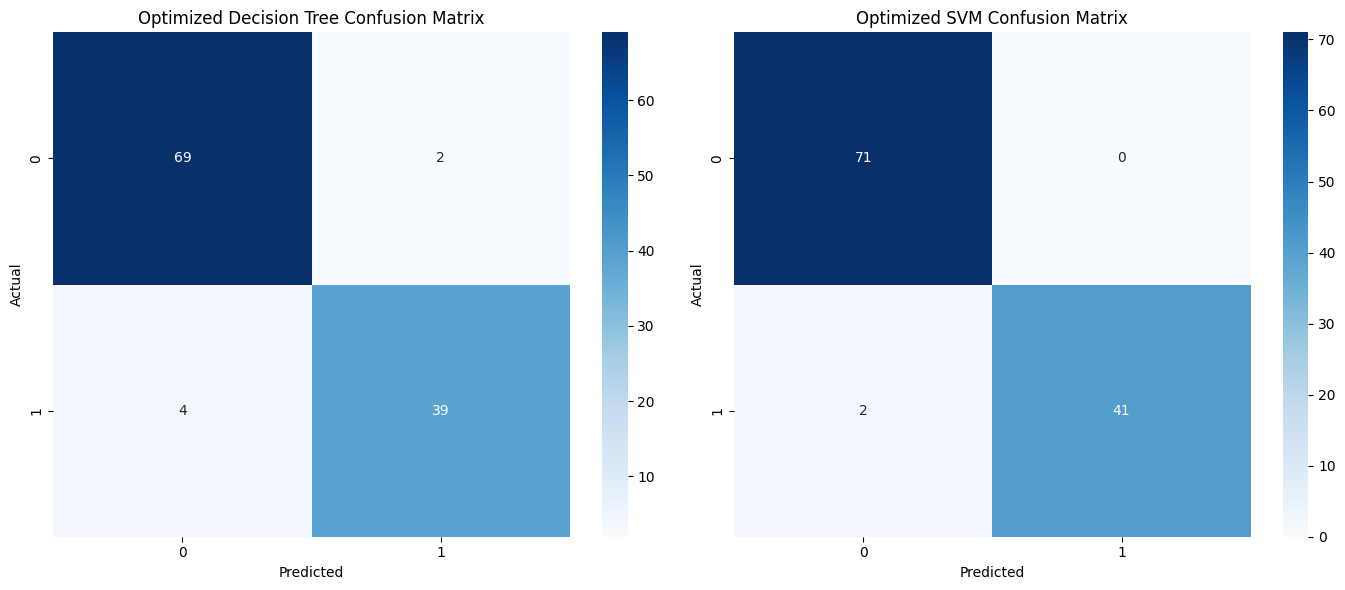

In [11]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
conf_matrix_tree = confusion_matrix(y_test, y_pred_best_tree)
conf_matrix_svm = confusion_matrix(y_test, y_pred_best_svm)

# Create a figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion matrix for optimized Decision Tree
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Optimized Decision Tree Confusion Matrix')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Confusion matrix for optimized SVM
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Optimized SVM Confusion Matrix')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

# Show the plot
plt.tight_layout()
plt.show()


## Final Conclusion

In this project, we developed and optimized two machine learning models to classify breast cancer tumors as benign (B) or malignant (M) using features derived from digital images of biopsies. We employed a Decision Tree and a Support Vector Machine (SVM) for our classification task.

The **optimized Decision Tree** demonstrated a high level of accuracy (95%) with balanced precision and recall for both classes. It showed a slightly better performance in identifying benign cases compared to malignant ones.

The **optimized SVM** achieved an impressive overall accuracy of 98%, with perfect precision for malignant cases and excellent recall for benign cases. This indicates the SVM model is highly effective in distinguishing between benign and malignant tumors.

Both models demonstrated robust performance in classifying breast cancer tumors, with the SVM slightly outperforming the Decision Tree. The high accuracy, precision, and recall metrics indicate that these models can be reliable tools in assisting medical professionals with the diagnosis of breast cancer. The SVM, in particular, showed superior performance in accurately identifying malignant tumors, making it a valuable asset in medical diagnostics.